# Experiment 2.6
Preliminary HPO exploration for Transformer because never really done before for TS

General takeaways from preliminary analysis:
Smaller models: larger lr is best (lr > 0.001)
Larger models: lr 0.0005 or 0.0001
Small horizon: bs 32
Large horizon: bs 64

Goal:</br>
HPO of Transformer on ftS load, pred_len=24 </br>

Result: </br>


In [133]:
import pandas as pd
import matplotlib.pyplot as plt
%pwd

'/Users/timw/Documents/University/thesis_2/scripts/Exp2.9'

In [134]:
#%%python3 -u create_hpo_tables.py --exp_name "Exp2.4"

## Import data and plot all benchmark results

In [135]:
hpo_table = pd.read_csv("./../../results/hpo_table_Exp2.9_metrics.csv", index_col=0)

In [136]:
hpo_table.sum(axis=0)

learning_rate        0.198000
batch_size        3840.000000
e_layers           840.000000
d_layers           120.000000
d_model          23808.000000
seq_len          25920.000000
pred_len         40320.000000
MSE                 11.375842
MAE                 26.468412
Epochs            1303.000000
Time[min]          925.000000
Params[Mio.]       366.800000
Max_mem[MB]      24172.760000
dtype: float64

<Axes: title={'center': 'MSE'}, xlabel='Params[Mio.]'>

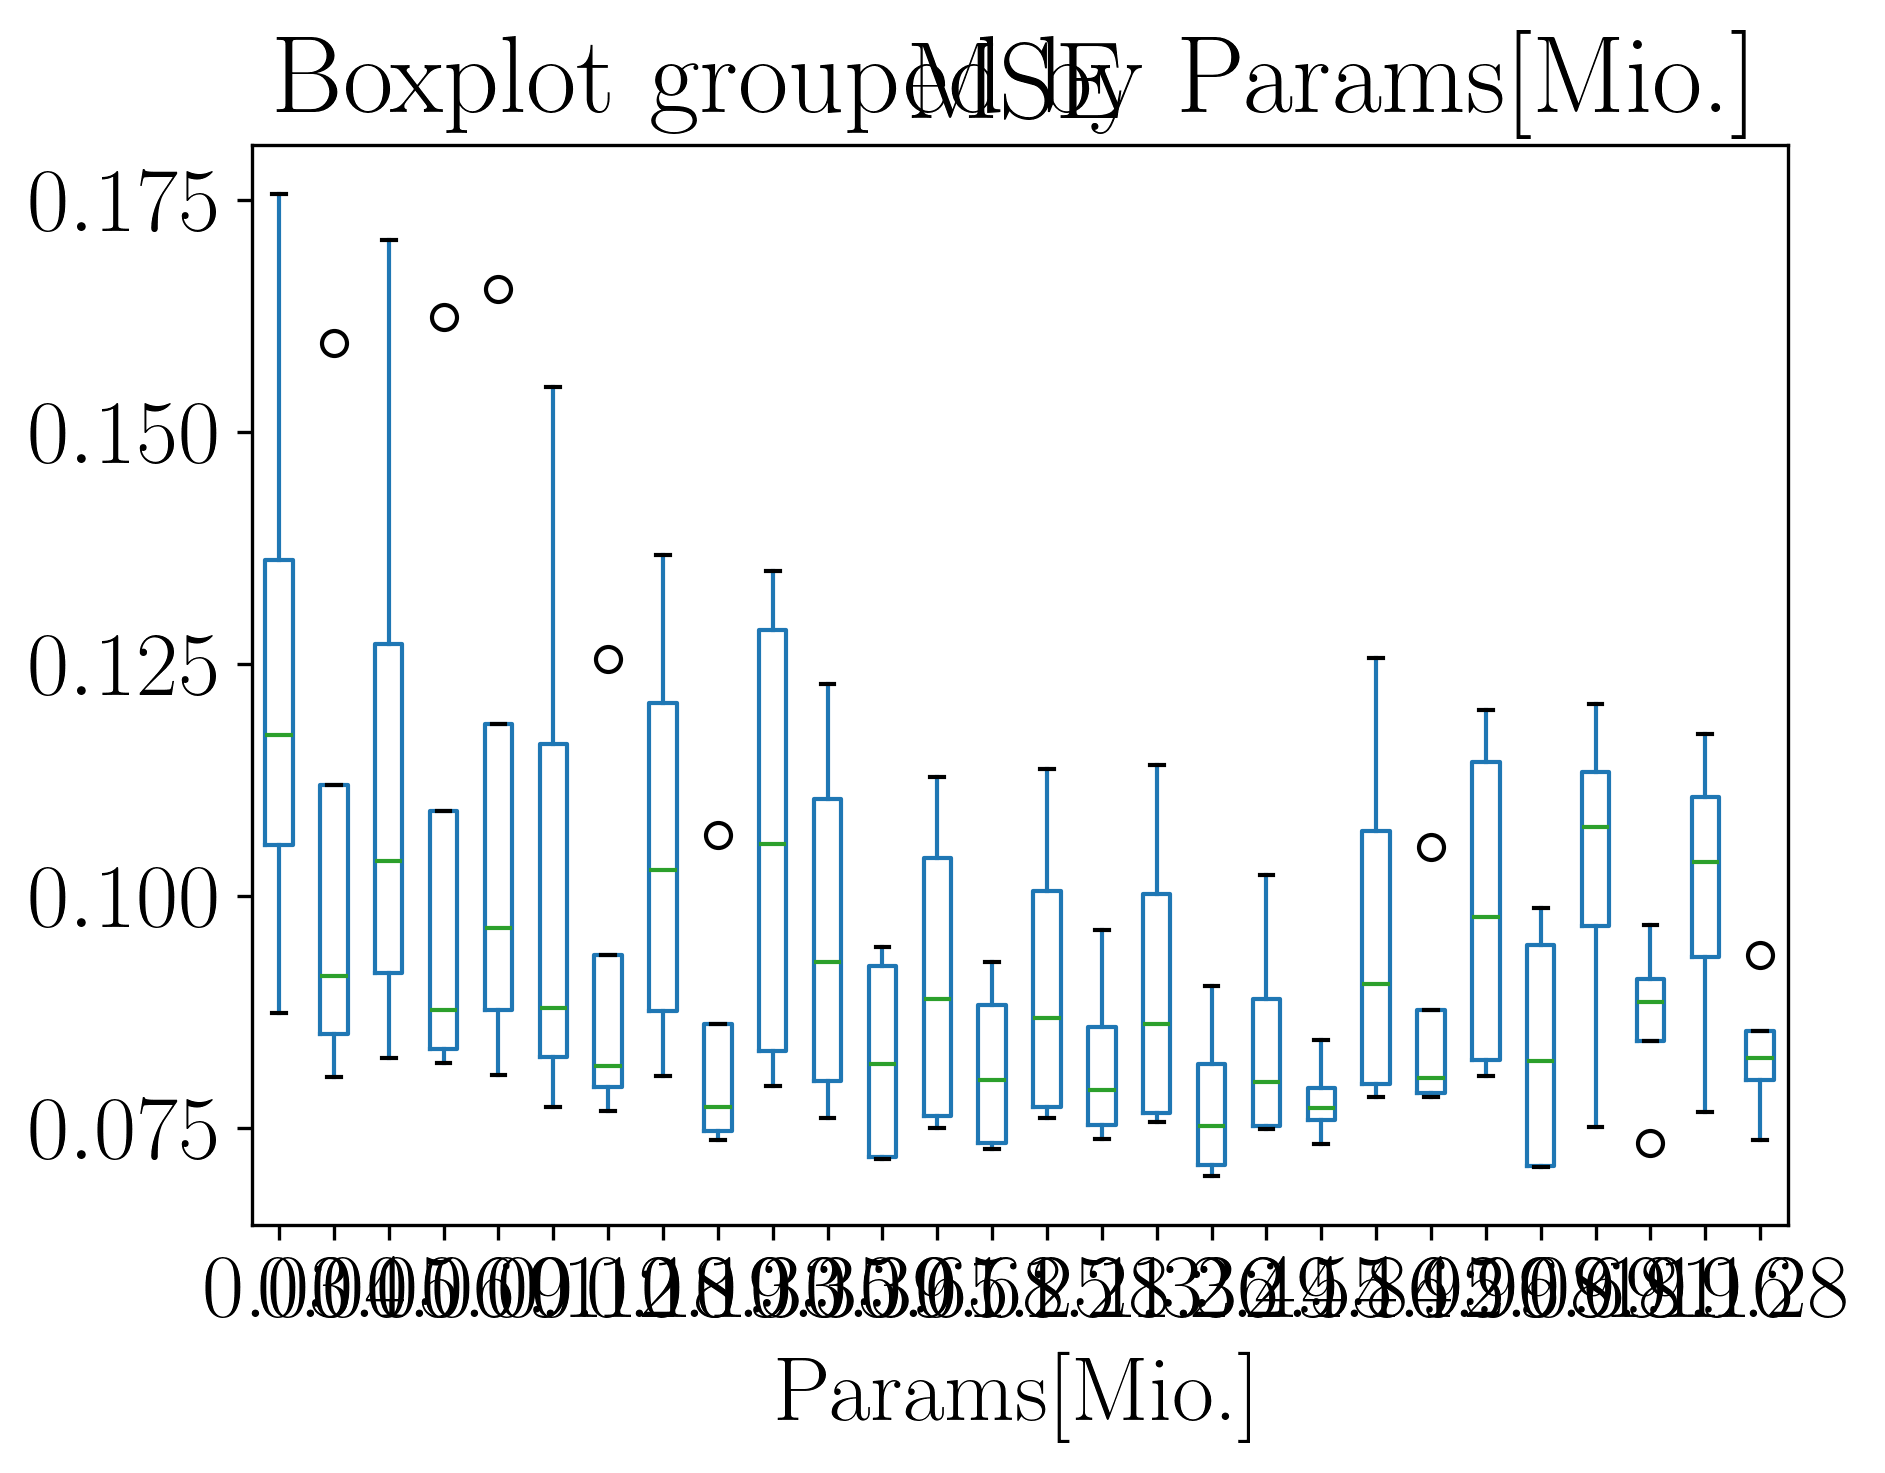

In [137]:
hpo_table.boxplot(by="Params[Mio.]", column="MSE", grid=False)

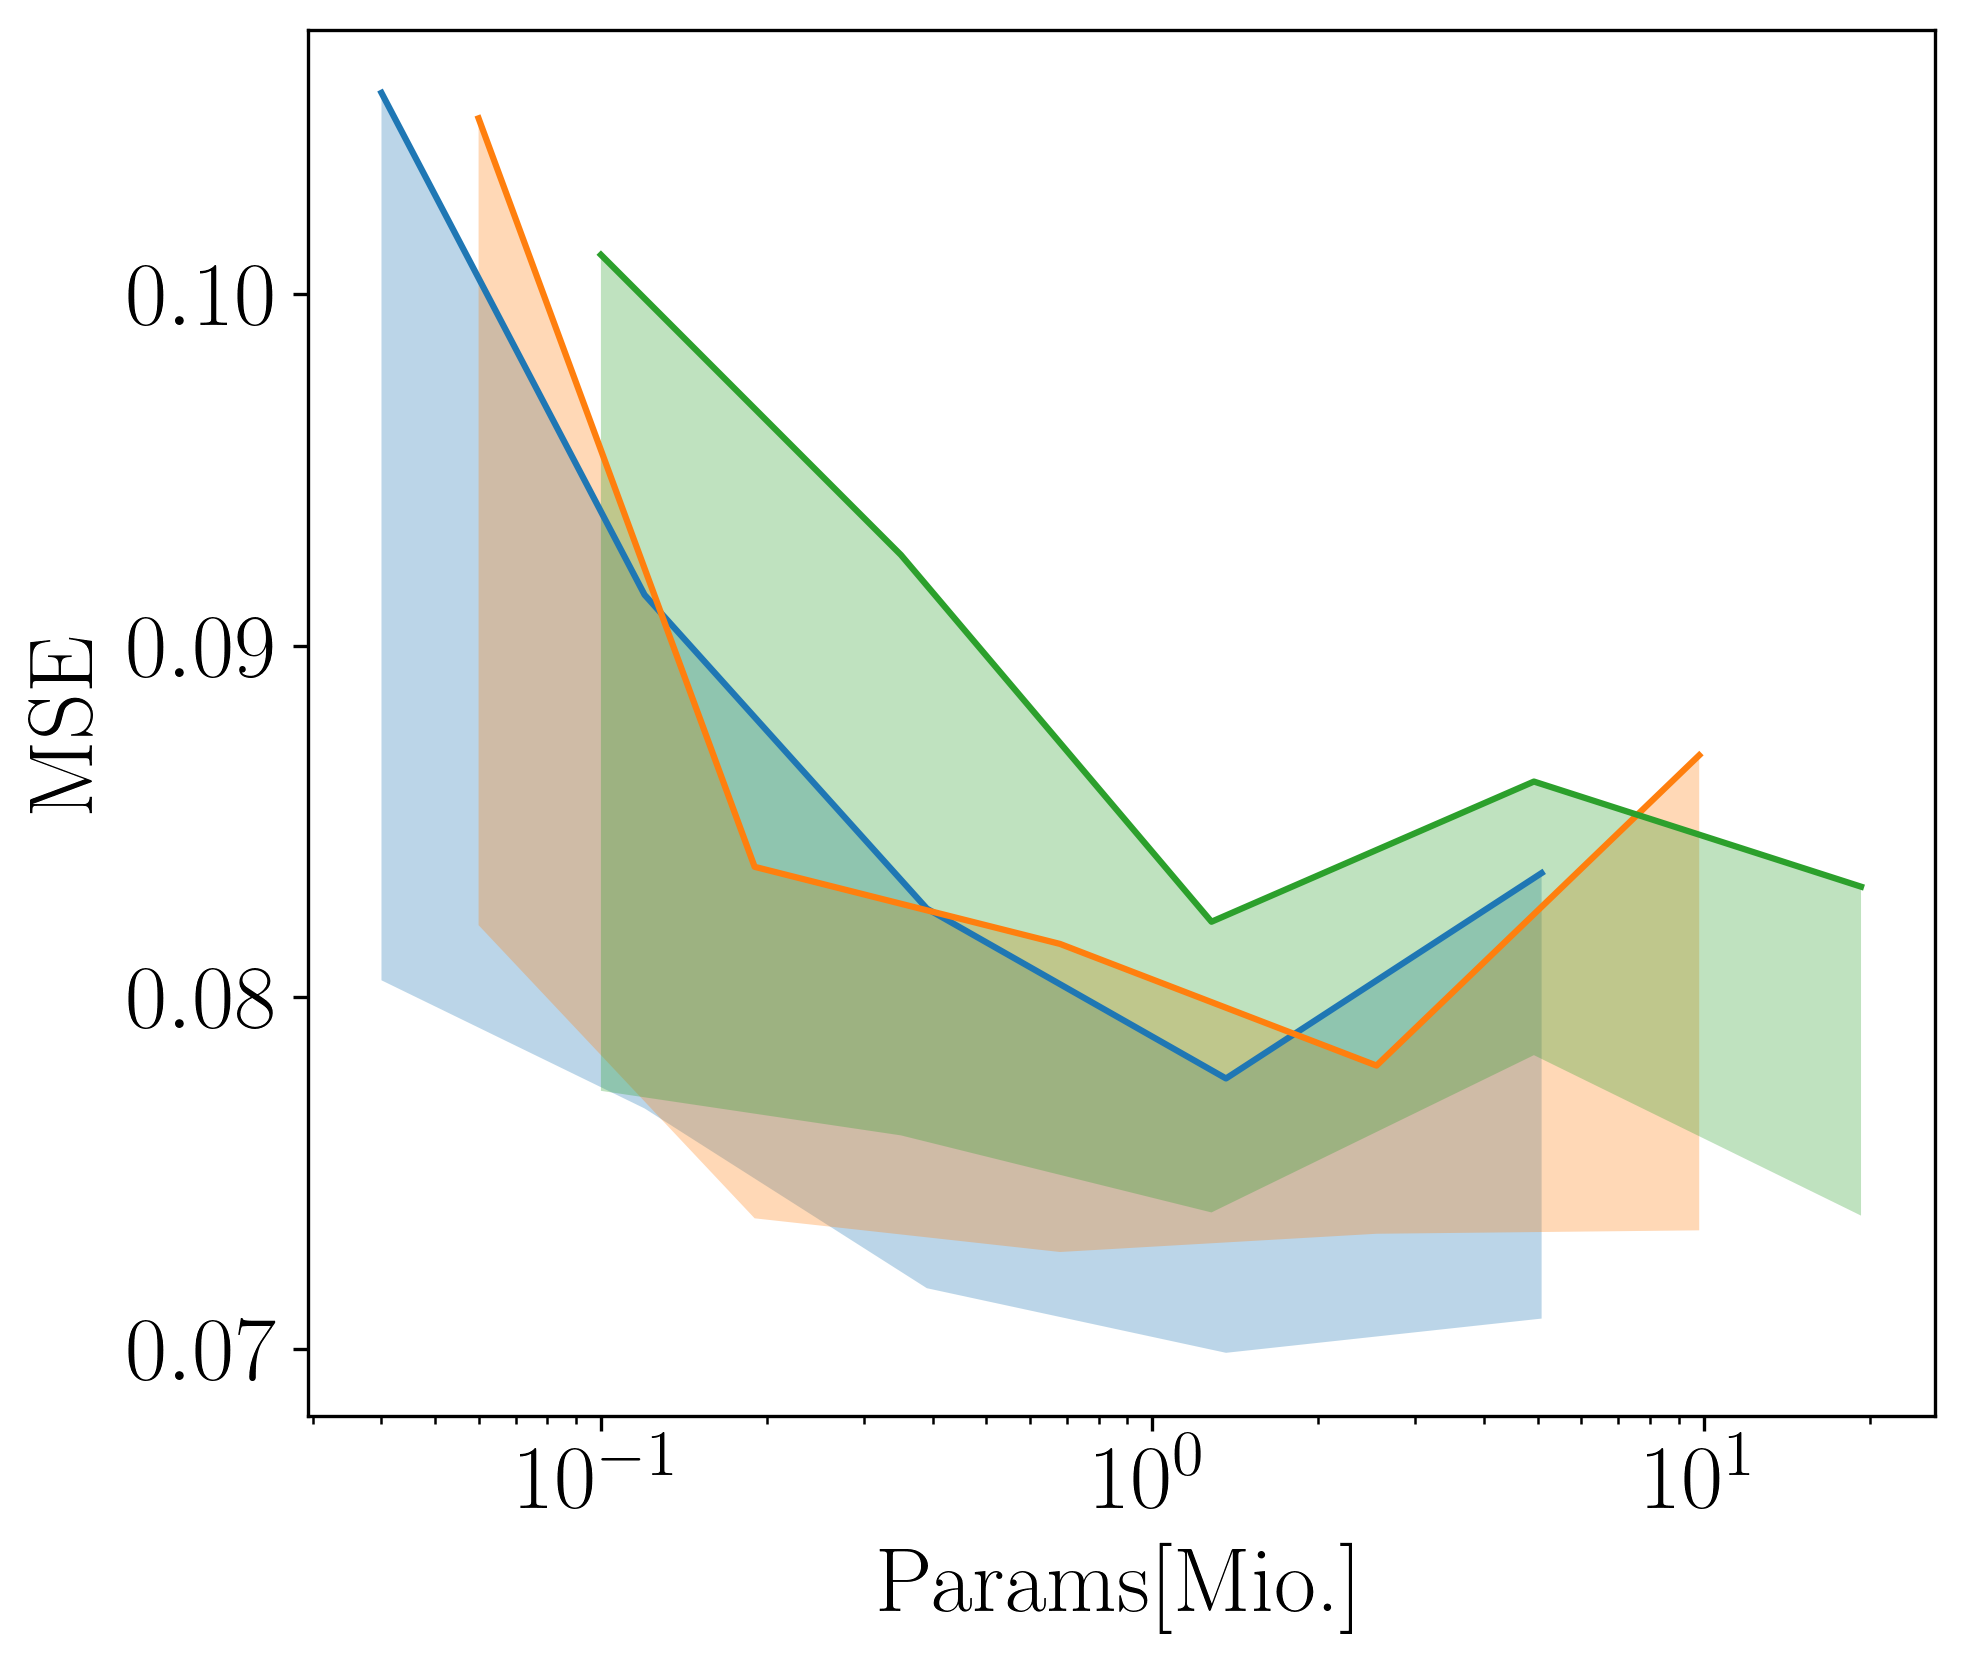

In [138]:
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

mc_table = hpo_table[hpo_table["seq_len"]==336].groupby(["e_layers", "Params[Mio.]"]).mean()
mc_min_table = hpo_table[hpo_table["seq_len"]==336].groupby(["e_layers", "Params[Mio.]"]).min()
#print(mc_table)
#print(mc_table.xs(2, level="e_layers").index)

#Plot MSE over Params. Each e_layer has a different color
fig, ax = plt.subplots(1,1,figsize=(7, 6))
for i in [3,6,12]:
    ax.plot(mc_table.xs(i, level="e_layers").index, mc_table.xs(i, level="e_layers")["MSE"], label=f"{i} layers")
    ax.fill_between(mc_table.xs(i, level="e_layers").index, mc_min_table.xs(i, level="e_layers")["MSE"], mc_table.xs(i, level="e_layers")["MSE"], alpha=0.3)

ax.set_xlabel("Params[Mio.]")
ax.set_ylabel("MSE")
#ax.legend(loc="upper right")
ax.set_xscale("log")
# Move the x-axis to the top
#ax.xaxis.set_ticks_position('top')
#ax.xaxis.set_label_position('top')
plt.show()

In [139]:
hpo_table[hpo_table["MSE"]<0.08].groupby("e_layers").mean()

learning_rate  batch_size  d_layers     d_model     seq_len  \
e_layers                                                                
3              0.000655        32.0       1.0  250.181818  270.545455   
6              0.000914        32.0       1.0  214.857143  250.285714   
12             0.000942        32.0       1.0  205.333333  236.000000   

          pred_len       MSE       MAE     Epochs  Time[min]  Params[Mio.]  \
e_layers                                                                     
3            336.0  0.073800  0.195243  11.181818   5.272727      1.644545   
6            336.0  0.075209  0.198155  12.000000   8.285714      2.525714   
12           336.0  0.076894  0.200617   8.666667   9.083333      4.915000   

          Max_mem[MB]  
e_layers               
3          176.150909  
6          193.770714  
12         238.663333

In [140]:
sorted_df = hpo_table.sort_values(by="MSE")
sorted_df.head(50)

learning_rate  batch_size  e_layers  d_layers  d_model  seq_len  \
67          0.0010          32         3         1      256      336   
9           0.0001          32         3         1      512      336   
39          0.0005          32         3         1      512      336   
37          0.0005          32         3         1      256      336   
65          0.0010          32         3         1      128      336   
35          0.0005          32         3         1      128      336   
75          0.0010          32         6         1      128      336   
47          0.0005          32         6         1      256      336   
19          0.0001          32         6         1      512      336   
45          0.0005          32         6         1      128      336   
103         0.0050          32         6         1       64      336   
29          0.0001          32        12         1      512      336   
55          0.0005          32        12         1      128      336   
46          0.0005          32         6         1      256       96   
74          0.0010          32         6         1      128       96   
73          0.0010          32         6         1       64      336   
18          0.0001          32         6         1      512       96   
76          0.0010          32         6         1      256       96   
66          0.0010          32         3         1      256       96   
85          0.0010          32        12         1      128      336   
83          0.0010          32        12         1       64      336   
54          0.0005          32        12         1      128       96   
64          0.0010          32         3         1      128       96   
28          0.0001          32        12         1      512       96   
77          0.0010          32         6         1      256      336   
44          0.0005          32         6         1      128       96   
63          0.0010          32         3         1       64      336   
36          0.0005          32         3         1      256       96   
111         0.0050          32        12         1       32      336   
17          0.0001          32         6         1      256      336   
84          0.0010          32        12         1      128       96   
57          0.0005          32        12         1      256      336   
56          0.0005          32        12         1      256       96   
27          0.0001          32        12         1      256      336   
7           0.0001          32         3         1      256      336   
43          0.0005          32         6         1       64      336   
82          0.0010          32        12         1       64       96   
26          0.0001          32        12         1      256       96   
93          0.0050          32         3         1       64      336   
91          0.0050          32         3         1       32      336   
38          0.0005          32         3         1      512       96   
72          0.0010          32         6         1       64       96   
110         0.0050          32        12         1       32       96   
53          0.0005          32        12         1       64      336   
34          0.0005          32         3         1      128       96   
117         0.0050          32        12         1      256      336   
101         0.0050          32         6         1       32      336   
81          0.0010          32        12         1       32      336   
119         0.0050          32        12         1      512      336   
25          0.0001          32        12         1      128      336   

     pred_len       MSE       MAE  Epochs  Time[min]  Params[Mio.]  \
67        336  0.069893  0.191371      11          5          1.36   
9         336  0.070867  0.192527      11          5          5.08   
39        336  0.071028  0.192016       7          3          5.08   
37        336  0.071418  0.192739       9          4

In [141]:
average_model = sorted_df.iloc[0:10].describe().iloc[1:3]
best_model = sorted_df.iloc[0:3]
worst_model = sorted_df.iloc[-1:]

overview_models = pd.concat([average_model, worst_model, best_model], axis=0)

overview_models.rename(index={"mean":"Mean Top10", "std":"Std Top10"}, inplace=True)
overview_models.drop(columns=["MAE", "batch_size", "d_layers", "Time[min]", "Max_mem[MB]", "pred_len"], inplace=True)
overview_models.rename(columns={"learning_rate": "Lr", "e_layers": "Enc. layers", "d_model": "D. model", "seq_len": "Seq. len."}, inplace=True)
overview_models = overview_models.sort_index(axis=1)
overview_models = overview_models.round(6)
mse_column, lr_column, epoch_column = overview_models.pop("MSE"), overview_models.pop("Lr"), overview_models.pop("Epochs")
overview_models.insert(4, "Epochs", epoch_column)
overview_models= overview_models.round(2)

overview_models[["D. model", "Enc. layers", "Seq. len.", "Epochs"]] = overview_models[["D. model", "Enc. layers", "Seq. len.", "Epochs"]].astype(int)

overview_models.insert(0, "Lr", lr_column)
overview_models.insert(6, "MSE", mse_column)
overview_models

Lr  D. model  Enc. layers  Params[Mio.]  Seq. len.  Epochs  \
Mean Top10  0.000570       281            4          2.74        336       9   
Std Top10   0.000337       168            1          3.06          0       1   
0           0.000100        32            3          0.03         96      16   
67          0.001000       256            3          1.36        336      11   
9           0.000100       512            3          5.08        336      11   
39          0.000500       512            3          5.08        336       7   

                 MSE  
Mean Top10  0.071998  
Std Top10   0.001241  
0           0.175695  
67          0.069893  
9           0.070867  
39          0.071028

In [142]:
best_mse = sorted_df.iloc[0]["MSE"]
best_mse

0.0698931962251663

## Params[Mio.] vs MSE

In [143]:
hpo_table.sort_values(by=["Params[Mio.]","MSE"], inplace=True)
hpo_table

learning_rate  batch_size  e_layers  d_layers  d_model  seq_len  \
90          0.0050          32         3         1       32       96   
60          0.0010          32         3         1       32       96   
30          0.0005          32         3         1       32       96   
0           0.0001          32         3         1       32       96   
91          0.0050          32         3         1       32      336   
..             ...         ...       ...       ...      ...      ...   
58          0.0005          32        12         1      512       96   
29          0.0001          32        12         1      512      336   
119         0.0050          32        12         1      512      336   
89          0.0010          32        12         1      512      336   
59          0.0005          32        12         1      512      336   

     pred_len       MSE       MAE  Epochs  Time[min]  Params[Mio.]  \
90        336  0.087443  0.211696      12          6          0.03   
60        336  0.111606  0.236798      12          6          0.03   
30        336  0.123108  0.250623      16          7          0.03   
0         336  0.175695  0.309218      16          8          0.03   
91        336  0.080486  0.202959      12          6          0.04   
..        ...       ...       ...     ...        ...           ...   
58        336  0.117490  0.242605       4          4         19.16   
29        336  0.073795  0.196911       6          6         19.28   
119       336  0.082412  0.208420       4          4         19.28   
89        336  0.082724  0.207255       4          4         19.28   
59        336  0.093665  0.220054       4          4         19.28   

     Max_mem[MB]  
90        147.22  
60        147.22  
30        147.22  
0         147.22  
91        148.04  
..           ...  
58        455.43  
29        458.68  
119       458.68  
89        458.68  
59        458.68  

[120 rows x 13 columns]

In [144]:
reduced_hpo_table = hpo_table[["learning_rate", "batch_size", "Params[Mio.]", "MSE", "seq_len", "e_layers", "d_model"]]
print(reduced_hpo_table.shape)

(120, 7)


In [145]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
from matplotlib.colors import Normalize
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.cm import ScalarMappable


def parallel_coordinates(data, column_names, threshold=None, ynames=None):
    fig, host = plt.subplots(figsize=(7, 6))

    if threshold is not None:
        data = data[data["MSE"] < threshold]
    
    ynames = column_names if ynames is None else ynames
        
    data = data[column_names]
    ys = data.to_numpy()
    N = ys.shape[0]

    # Normalize data
    ymins = ys.min(axis=0)
    ymaxs = ys.max(axis=0)
    dys = ymaxs - ymins
    ymins -= dys * 0.05  # add 5% padding below and above
    ymaxs += dys * 0.05
    dys = ymaxs - ymins

    # transform all data to be compatible with the main axis
    zs = np.zeros_like(ys)
    zs[:, 0] = ys[:, 0]
    zs[:, 1:] = (ys[:, 1:] - ymins[1:]) / dys[1:] * dys[0] + ymins[0]

    # Add small horizontal jitter for better visibility
    jitter_strength = 0.00005 
    jitter = np.random.normal(0, jitter_strength, zs.shape)
    jitter[:, 0] = np.random.normal(0, 0.00005, zs[:, 0].shape)
    jitter[:, -1] = 0  # Don't jitter the last column
    zs += jitter
    #zs[:, -2][zs[:, -2] < 0] = 0 # Avoid negative values

    # Create the parallel coordinates
    axes = [host] + [host.twinx() for i in range(ys.shape[1] - 1)]
    
    for i, ax in enumerate(axes):
        ax.set_ylim(ymins[i], ymaxs[i])
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        if ax != host:
            ax.spines['left'].set_visible(False)
            ax.yaxis.set_ticks_position('right')
            ax.spines["right"].set_position(("axes", i / (ys.shape[1] - 1)))
        ax.tick_params(axis='y', labelsize=22)
        ax.tick_params(axis='x', length=0)
            #ax.set_yscale('log')
        
    #axes[-3].set_yscale('log')
    

    host.set_xlim(0, ys.shape[1] - 1) 
    host.set_xticks(range(ys.shape[1]))
    host.set_xticklabels(ynames, fontsize=22)
    host.tick_params(axis='x', which='major', pad=7)
    host.spines['right'].set_visible(False)
    host.xaxis.tick_top()
    #host.set_title('Parallel Coordinate Plot Transformer pred_len 24', fontsize=22)

    # Use a colormap and normalize based on the last column of ys
    color_norm = Normalize(vmin=ys[:, -1].min(), vmax=ys[:, -1].max())
    cmap = plt.get_cmap('viridis')

    sm = ScalarMappable(norm=color_norm, cmap=cmap)
    sm.set_array([])

    for j in range(N):
        color = cmap(color_norm(ys[j, -1]))
        verts = list(zip([x for x in np.linspace(0, len(ys) - 1, len(ys) * 3 - 2, endpoint=True)], np.repeat(zs[j, :], 3)[1:-1]))
        codes = [Path.MOVETO] + [Path.CURVE4 for _ in range(len(verts) - 1)]
        path = Path(verts, codes)
        patch = patches.PathPatch(path, facecolor='none', lw=1, edgecolor=color)
        host.add_patch(patch)
    
    # Bring MSE axis to front (before color bar)
    axes[-1].set_zorder(10) 
    
    # Color bar
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", size="20%", pad=0.0)
    cbar = plt.colorbar(sm, cax=cax)
    cbar.ax.yaxis.set_ticks([])
  
    plt.tight_layout()
    plt.show()


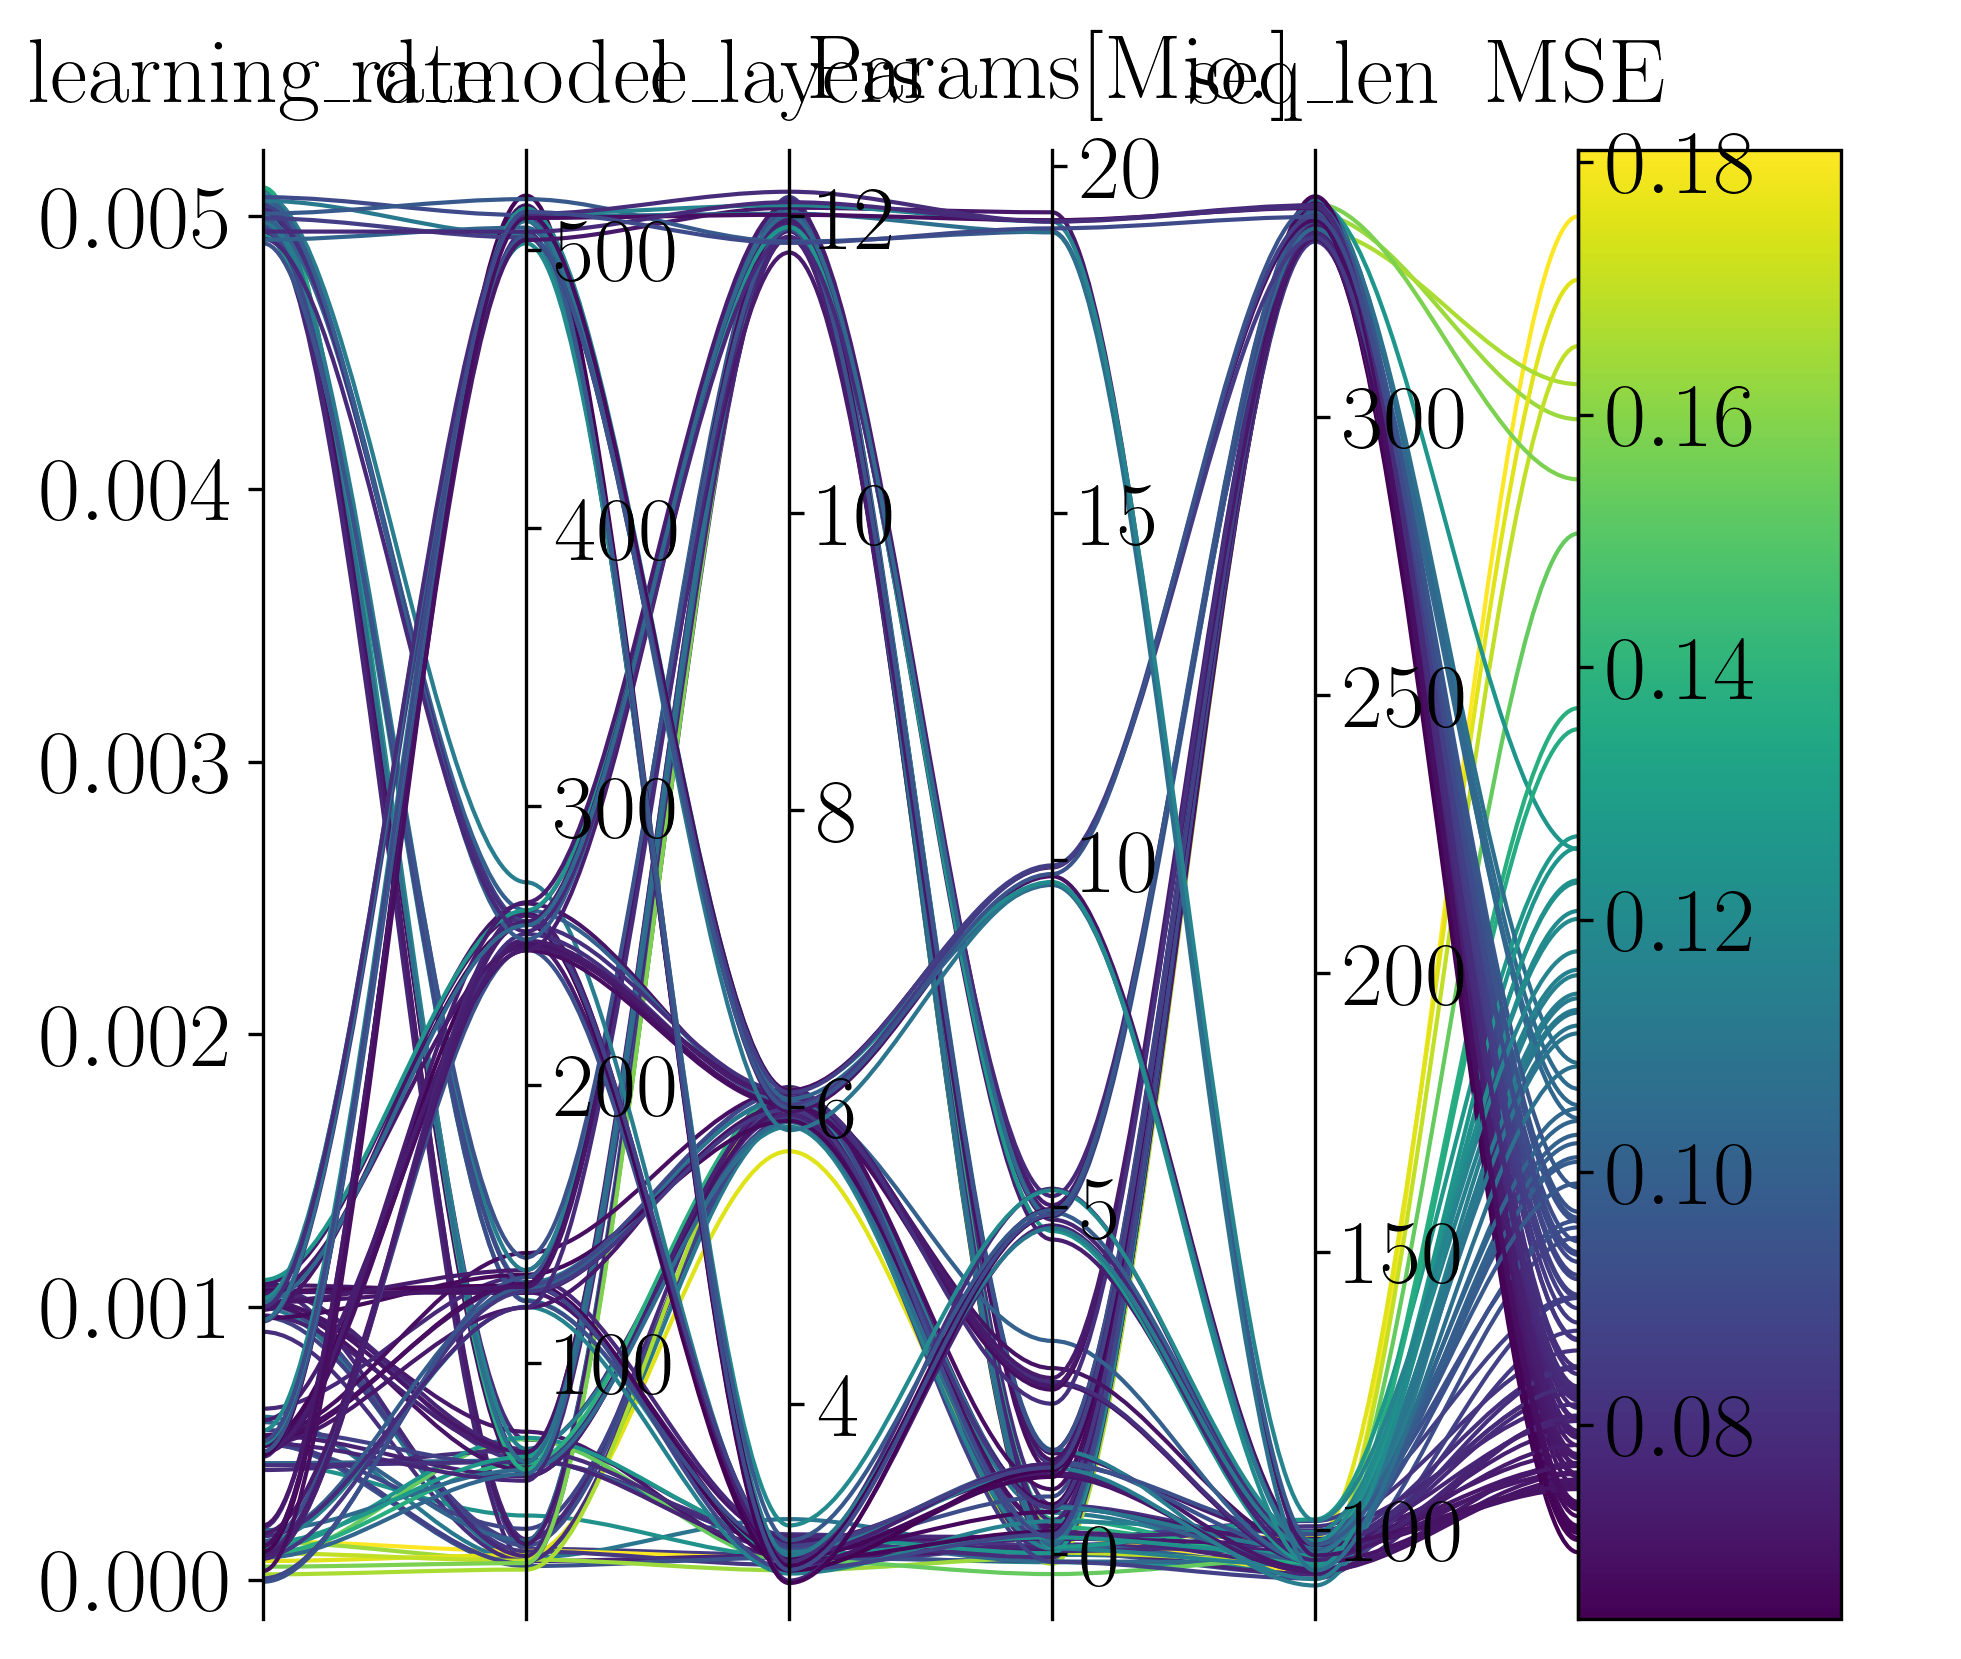

In [146]:
parallel_coordinates(reduced_hpo_table, ["learning_rate", "d_model", "e_layers", "Params[Mio.]", "seq_len", "MSE"])

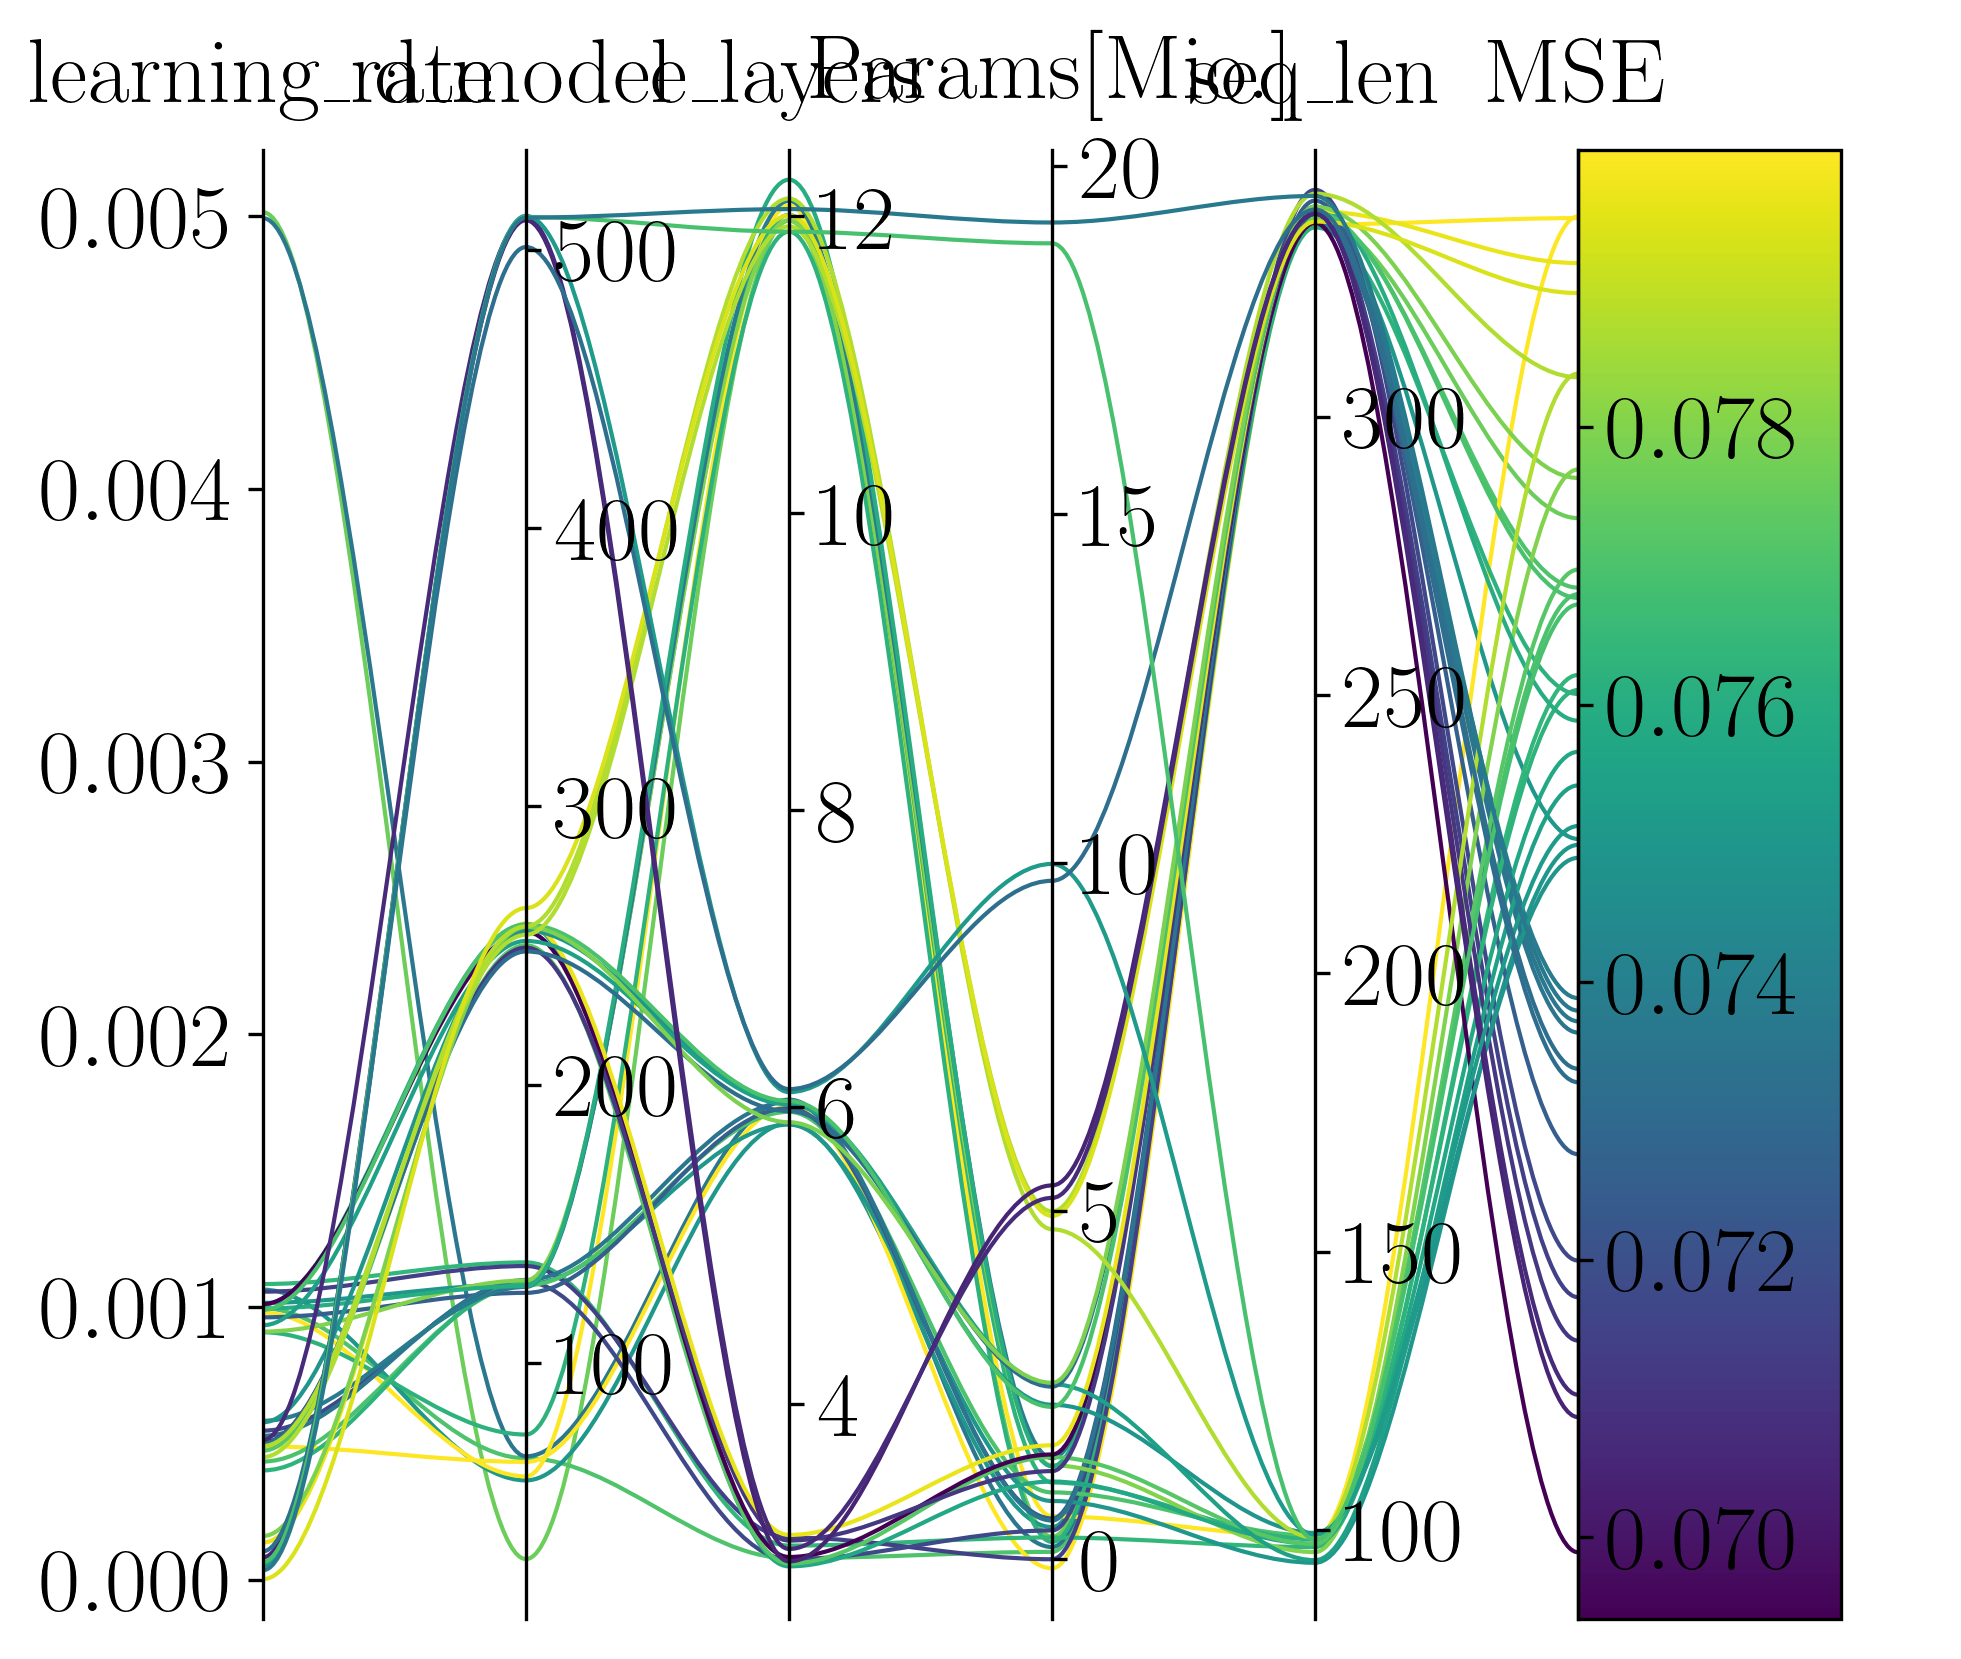

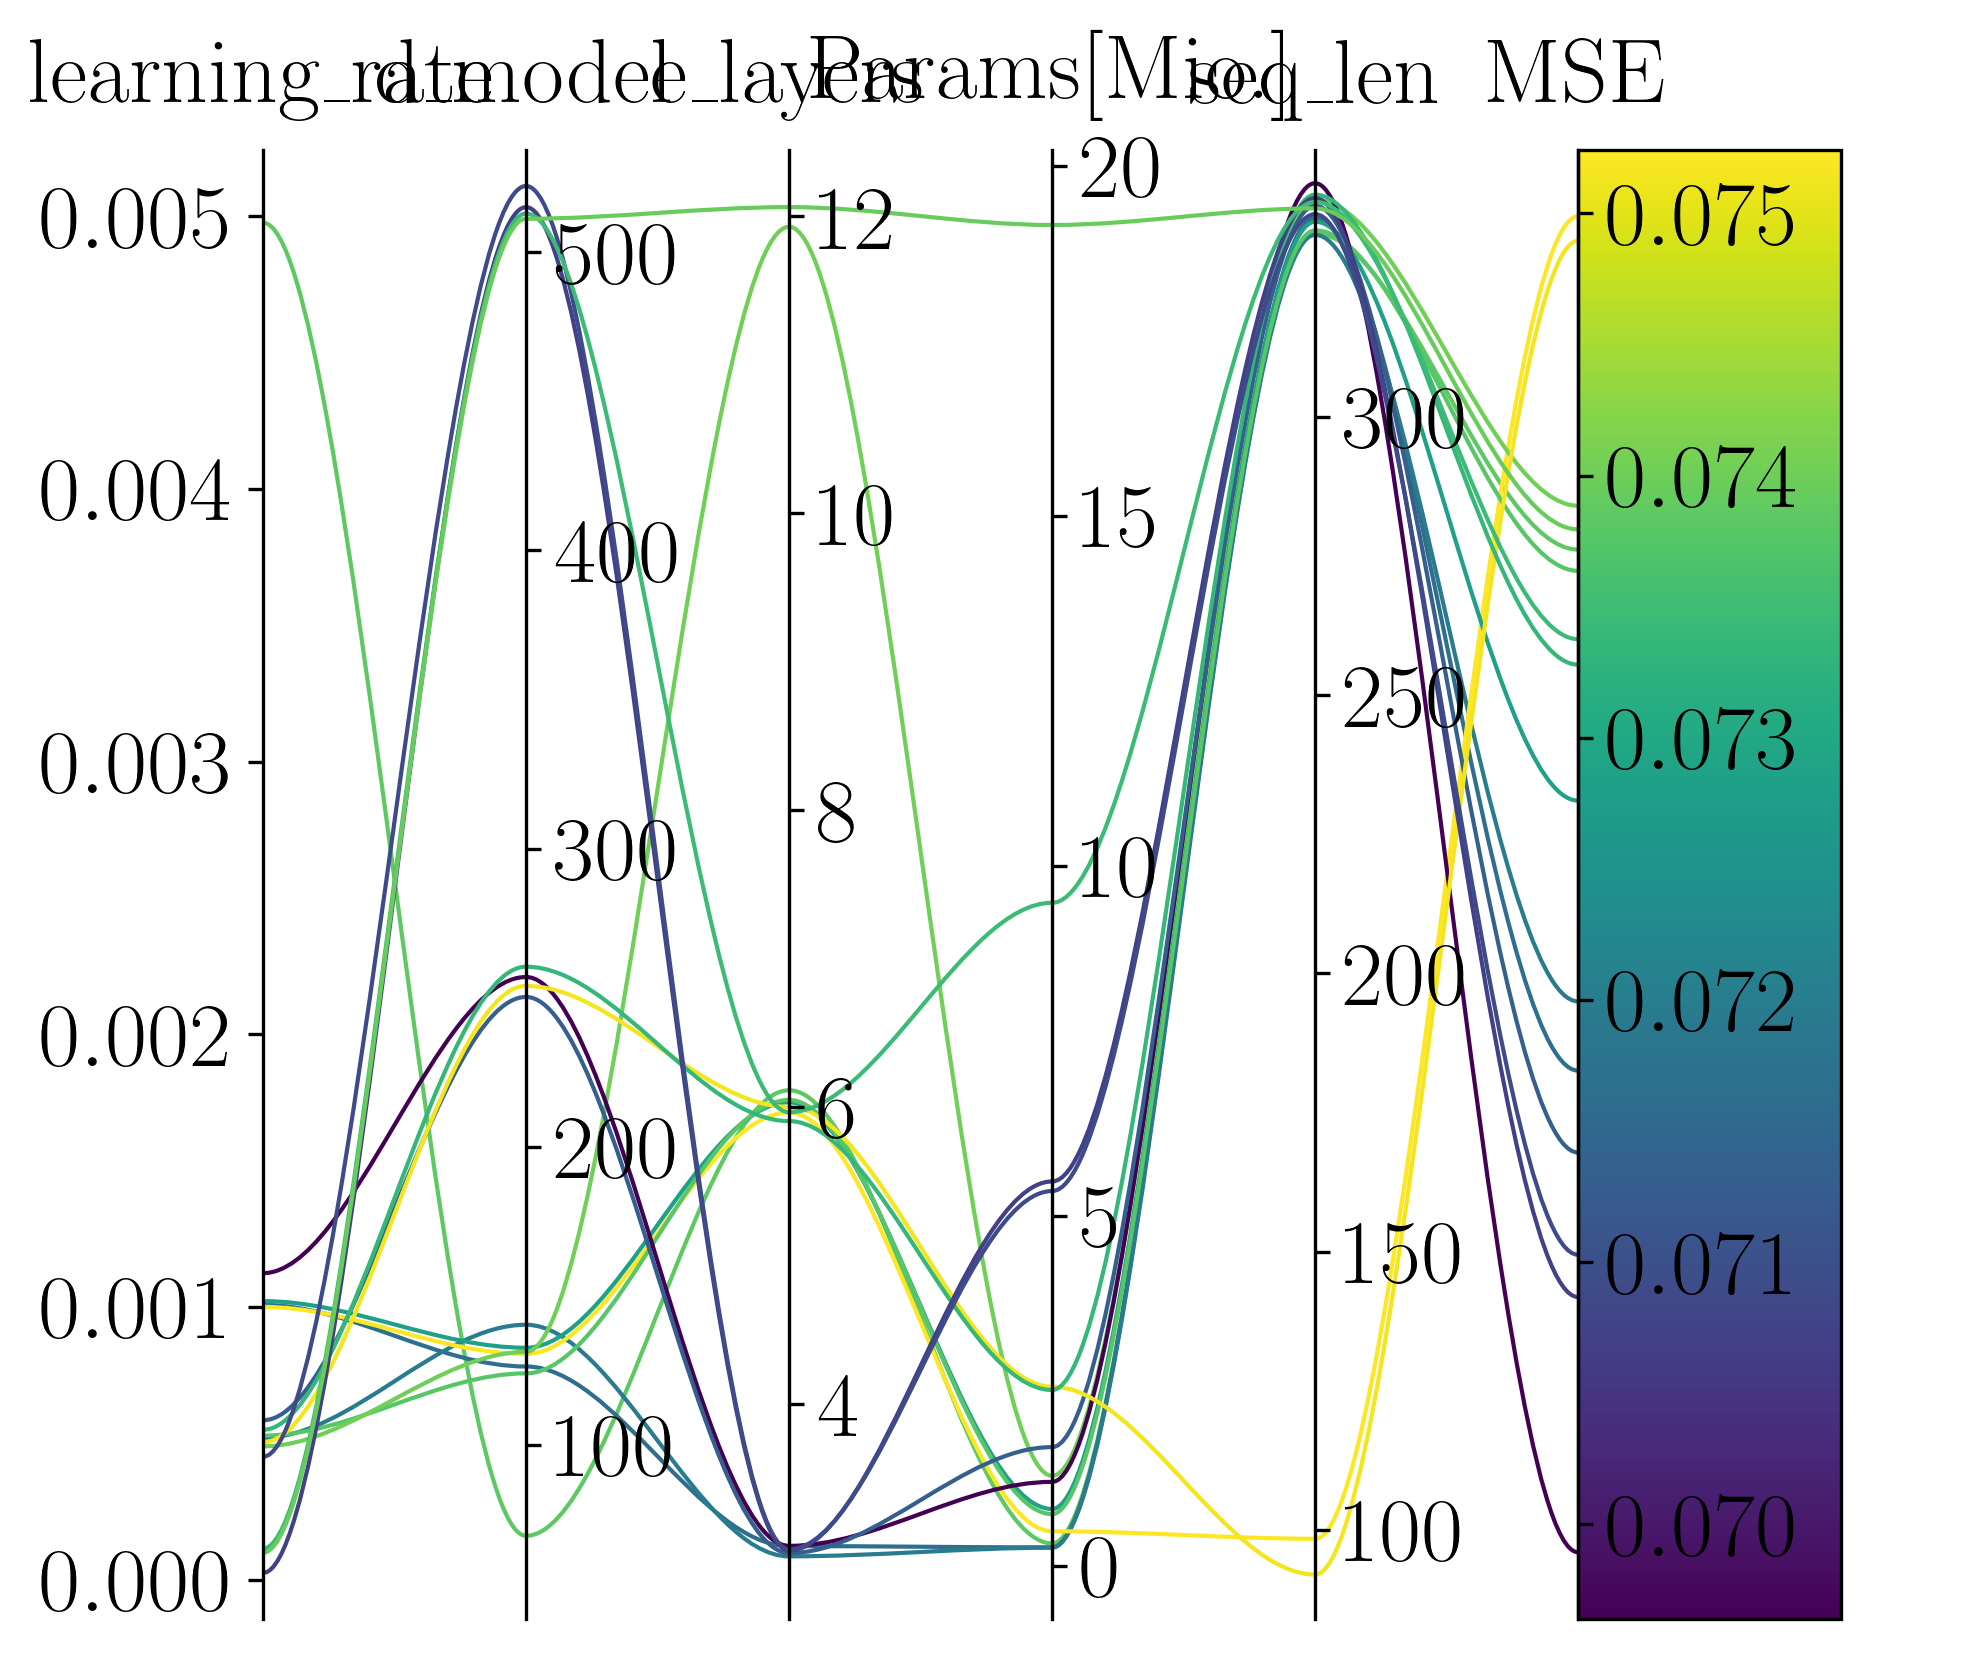

In [147]:
parallel_coordinates(reduced_hpo_table, ["learning_rate", "d_model", "e_layers", "Params[Mio.]", "seq_len", "MSE"], threshold=0.08)
parallel_coordinates(reduced_hpo_table, ["learning_rate", "d_model", "e_layers", "Params[Mio.]", "seq_len", "MSE"], threshold=0.075)

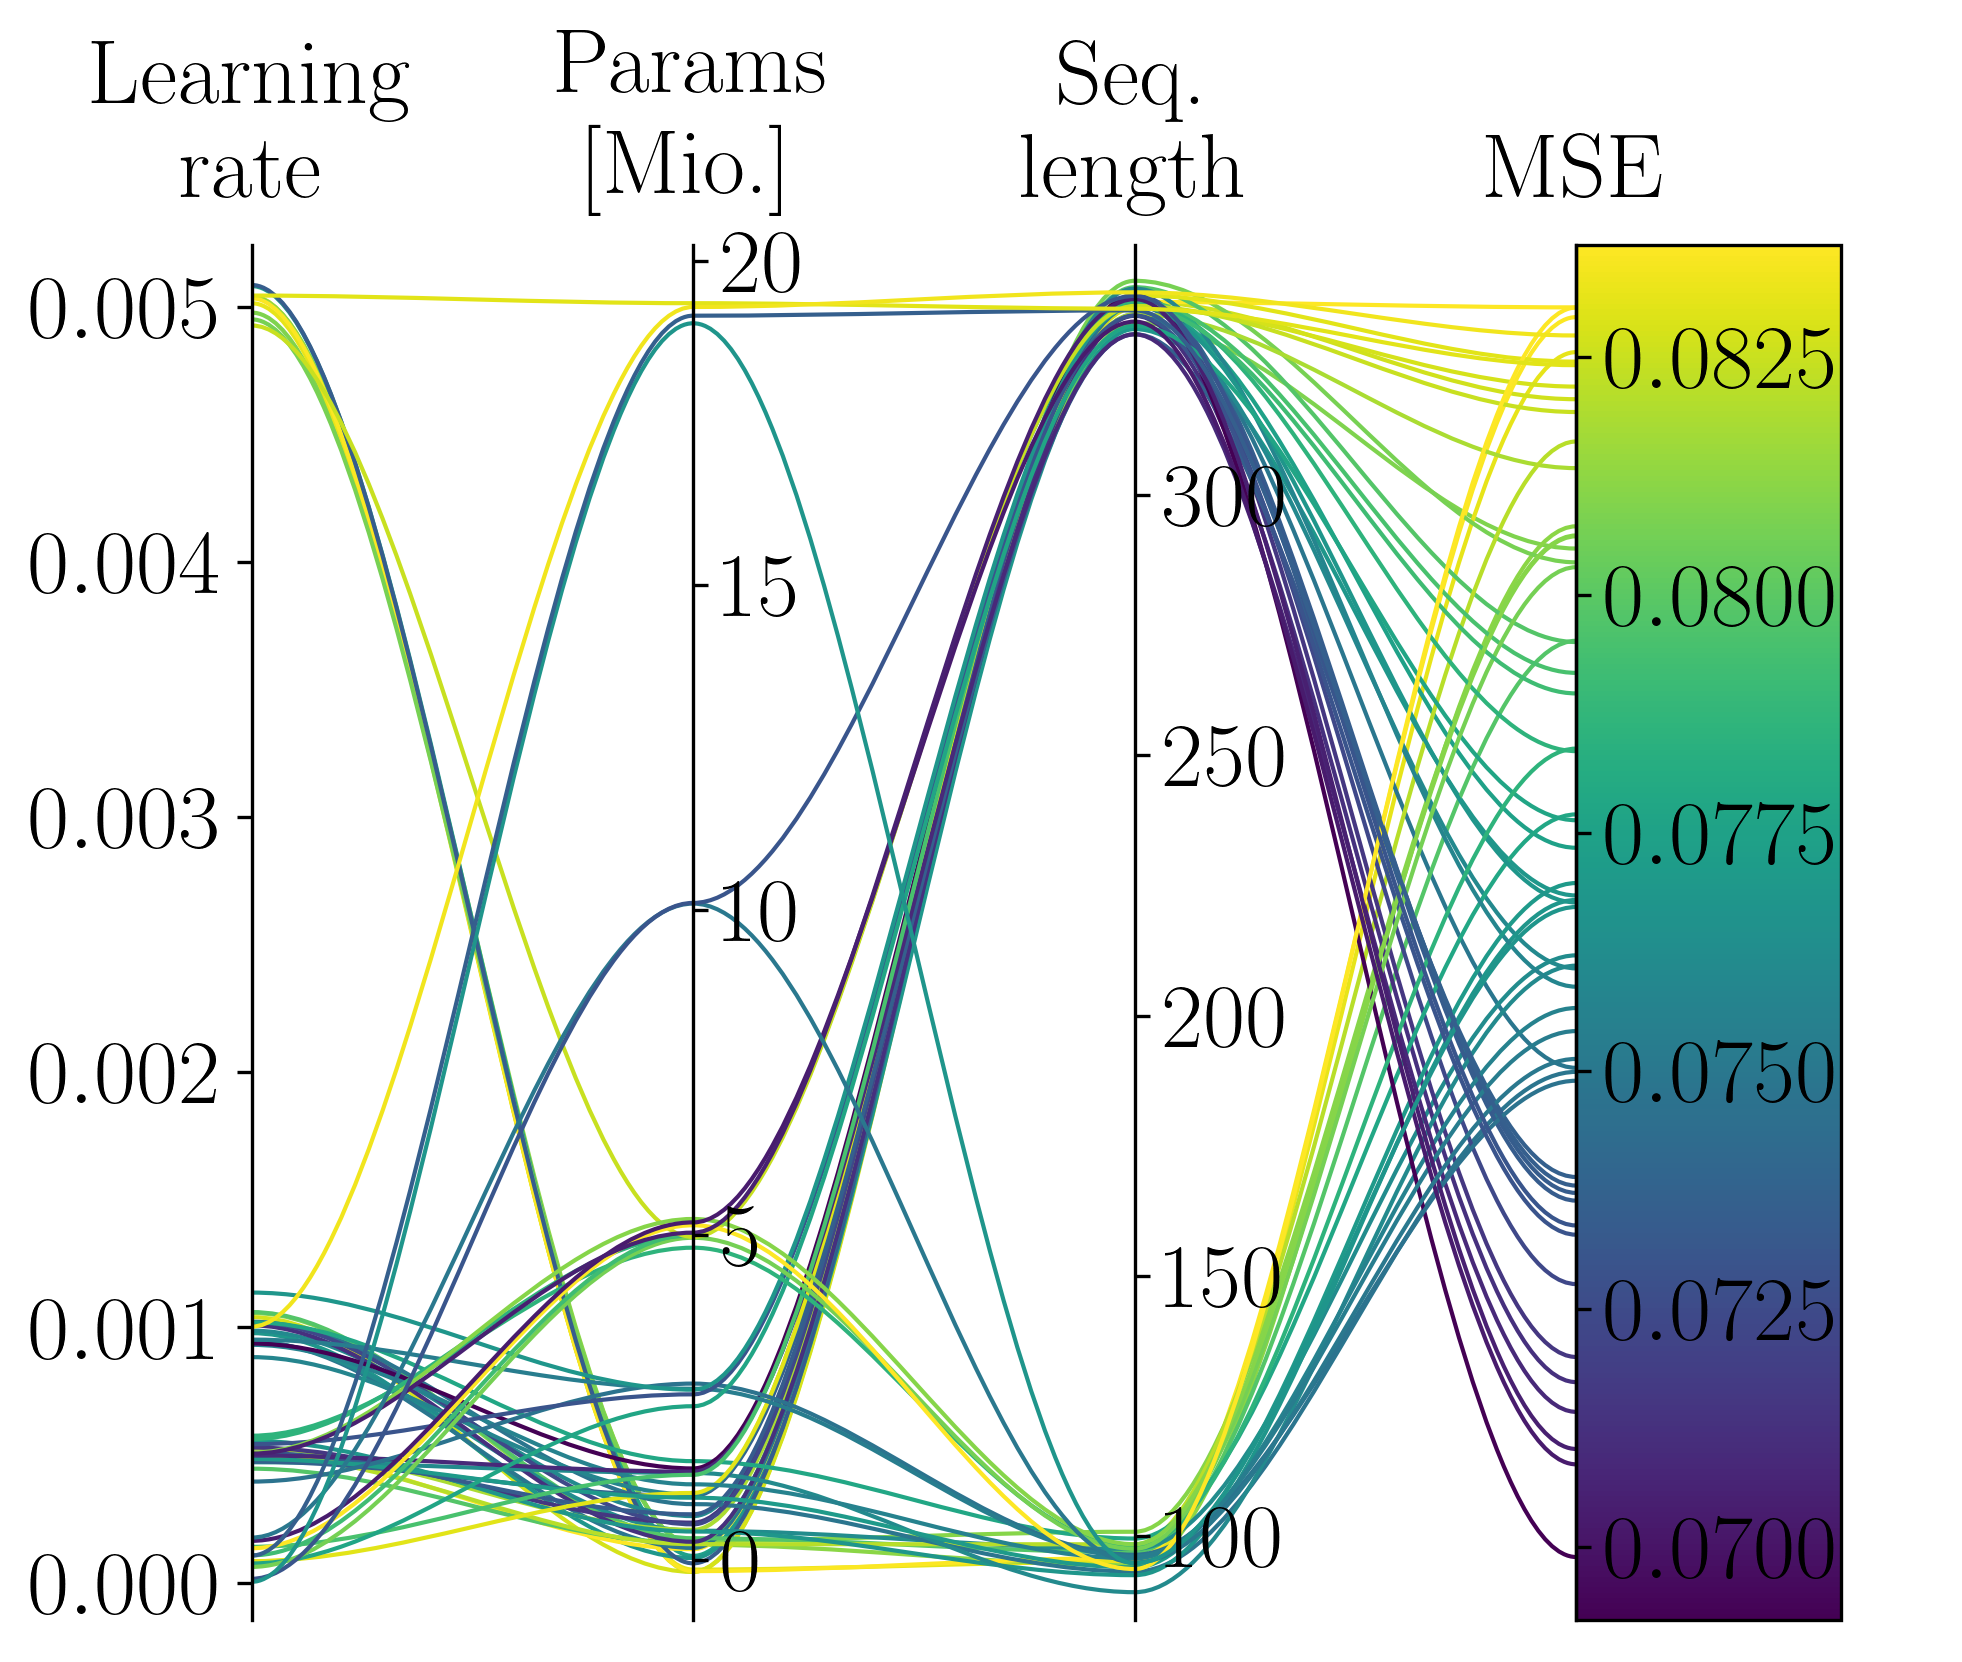

In [148]:
parallel_coordinates(reduced_hpo_table, ["learning_rate", "Params[Mio.]", "seq_len", "MSE"], threshold=best_mse * 1.2, ynames=["Learning \n rate", "Params \n [Mio.]", "Seq. \n length", "MSE"])